In [147]:
import uproot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

In [148]:
ROOT = '/Users/user/data/research/proton-deuteron/protons/hist_bbox_100a_RecoBBox100A_20250815T193002.root'

In [157]:
f = uproot.open(ROOT)
f.keys(), f.classnames()

(['hitnumfilter;1',
  'hitnumfilter/NumHits_Ind;1',
  'hitnumfilter/NumHits_Col;1',
  'hitnumfilter/NumHits_Ind_pass;1',
  'hitnumfilter/NumHits_Col_pass;1',
  'hitnumfilter/EventPass;1',
  'timestampfilter;1',
  'timestampfilter/Timestamps;1',
  'timestampfilter/Timestamps_pass;1',
  'timestampfilter/EvtCount;1',
  'tof;1',
  'tof/fderhit;1',
  'tof/fdeltaHit;1',
  'tof/fdeltaHitUS;1',
  'tof/fdeltaHitDS;1',
  'tof/fhitAsymmetryUS;1',
  'tof/fhitAsymmetryDS;1',
  'tof/fLenHit;1',
  'tof/fDerUSA;1',
  'tof/fDerUSB;1',
  'tof/fDerDSA;1',
  'tof/fDerDSB;1',
  'tof/fampHitUSA;1',
  'tof/fampHitUSB;1',
  'tof/fampHitDSA;1',
  'tof/fampHitDSB;1',
  'tof/TOF;1',
  'tof/TimeStamp;1',
  'tof/NTOF;1',
  'gaushitOrigin;1',
  'gaushitOrigin/fFirstChi2;1',
  'gaushitOrigin/fChi2;1',
  'toffilter;1',
  'toffilter/TOFBeforeCut;1',
  'trajcluster;1',
  'trajcluster/showervarstree;1',
  'trajclusterOrigin;1',
  'trajclusterOrigin/showervarstree;1',
  'wcquality;1',
  'wcquality/MomOriginal;1',
  'wcqu

In [158]:
t = f['anatree/anatree;4']
t.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
subrun               | int32_t                  | AsDtype('>i4')
event                | int32_t                  | AsDtype('>i4')
evttime              | double                   | AsDtype('>f8')
efield               | float                    | AsDtype('>f4')
lifetime             | float                    | AsDtype('>f4')
t0                   | int32_t                  | AsDtype('>i4')
nclus                | int32_t                  | AsDtype('>i4')
clustertwire         | float[]                  | AsJagged(AsDtype('>f4'))
clusterttick         | float[]                  | AsJagged(AsDtype('>f4'))
cluendwire           | float[]                  | AsJagged(AsDtype('>f4'))
cluendtick           | float[]                  | AsJagged(AsDtype('>f4'))
cluplane          

In [159]:
df = t.arrays(['run', 'subrun', 'event', 'trkdedx', 'trkrr', "hit_x", "hit_y", "hit_z", "hit_trkid"], library='pd'); df

,run,subrun,event,trkdedx,trkrr,hit_x,hit_y,hit_z,hit_trkid
0,8557,7,596,[[[7.489251613616943 6.762697219848633 6.62633...,[[[0.24617742002010345 0.738532304763794 1.225...,"[-999.0, -999.0, -999.0, -999.0, -999.0, -999....","[-999.0, -999.0, -999.0, -999.0, -999.0, -999....","[-999.0, -999.0, -999.0, -999.0, -999.0, -999....","[-9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -..."
1,8557,9,700,[[[1.0489054918289185 12.959992408752441 26.08...,[[[0.2246377021074295 0.6739131212234497 1.122...,"[19.89667510986328, 19.941232681274414, 19.985...","[0.8947963714599609, 0.9573682546615601, 1.019...","[3.1049935817718506, 2.604975461959839, 2.1093...","[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,8557,10,734,[[[0.45505285263061523 4.814302444458008 25.75...,[[[0.2237900048494339 0.6713700294494629 1.118...,"[19.85020637512207, 19.893089294433594, 19.935...","[0.22336722910404205, 0.2491169422864914, 0.27...","[3.4952609539031982, 3.012238025665283, 2.5386...","[0, 0, 0, 0, 0, 0, -9, -9, 0, 0, 0, 0, 0, 0, 0..."
3,8557,16,995,[[[0.6438756585121155 7.150038719177246 21.712...,[[[0.22812609374523163 0.6843782663345337 1.13...,"[-999.0, 18.30352020263672, 18.377151489257812...","[-999.0, 5.024529457092285, 5.035883903503418,...","[-999.0, 11.801629066467285, 11.33745670318603...","[-9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,8557,16,1015,[[[0.44085216522216797 3.66874623298645 9.9621...,[[[0.2938746511936188 0.8816239237785339 1.473...,"[-999.0, -999.0, -999.0, 23.964374542236328, 2...","[-999.0, -999.0, -999.0, 8.953424453735352, 8....","[-999.0, -999.0, -999.0, 32.146602630615234, 3...","[-9, -9, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...
11801,9788,297,26027,[[[2.881411075592041 14.711796760559082 16.386...,[[[0.2314481884241104 0.6943445801734924 1.154...,"[13.593657493591309, 13.705286026000977, 13.81...","[7.78081750869751, 7.748405933380127, 7.712105...","[16.476083755493164, 15.998371124267578, 15.51...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11802,9788,299,26208,[[[15.360520362854004 13.584263801574707 11.95...,[[[0.2485123574733734 0.7455371022224426 1.239...,"[-999.0, 18.516891479492188, 18.59587097167968...","[-999.0, -1.7725565433502197, -1.8120583295822...","[-999.0, 23.4370174407959, 22.947900772094727,...","[-9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
11803,9788,305,26707,[[[4.382761478424072 3.417616605758667 2.88244...,[[[7.811090469360352 7.369991779327393 6.92282...,"[-999.0, 14.326510429382324, 14.38771724700927...","[-999.0, 6.099799156188965, 6.1381611824035645...","[-999.0, 8.880555152893066, 8.38711929321289, ...","[-9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
11804,9788,308,26943,[[[1.1677722930908203 12.021357536315918 19.67...,[[[0.21932607889175415 0.6579782366752625 1.09...,"[15.827380180358887, 15.873085975646973, 15.91...","[1.345670223236084, 1.4122865200042725, 1.4789...","[2.844905138015747, 2.3423516750335693, 1.8396...","[0, 0, 0, -9, -9, -9, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [160]:
df = df[~df.applymap(lambda x: isinstance(x, list) and len(x) == 0).any(axis=1)].reset_index(); df
df = df[df['trkdedx'].apply(lambda x: isinstance(x, list) and len(x) == 1)].reset_index(drop=True); df

/var/folders/cm/m55y72dj6cd5lkwrfdb2bpnr0000gp/T/ipykernel_17591/2327327574.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[~df.applymap(lambda x: isinstance(x, list) and len(x) == 0).any(axis=1)].reset_index(); df


,index,run,subrun,event,trkdedx,trkrr,hit_x,hit_y,hit_z,hit_trkid
0,0,8557,7,596,[[[7.489251613616943 6.762697219848633 6.62633...,[[[0.24617742002010345 0.738532304763794 1.225...,"[-999.0, -999.0, -999.0, -999.0, -999.0, -999....","[-999.0, -999.0, -999.0, -999.0, -999.0, -999....","[-999.0, -999.0, -999.0, -999.0, -999.0, -999....","[-9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -..."
1,1,8557,9,700,[[[1.0489054918289185 12.959992408752441 26.08...,[[[0.2246377021074295 0.6739131212234497 1.122...,"[19.89667510986328, 19.941232681274414, 19.985...","[0.8947963714599609, 0.9573682546615601, 1.019...","[3.1049935817718506, 2.604975461959839, 2.1093...","[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,8557,10,734,[[[0.45505285263061523 4.814302444458008 25.75...,[[[0.2237900048494339 0.6713700294494629 1.118...,"[19.85020637512207, 19.893089294433594, 19.935...","[0.22336722910404205, 0.2491169422864914, 0.27...","[3.4952609539031982, 3.012238025665283, 2.5386...","[0, 0, 0, 0, 0, 0, -9, -9, 0, 0, 0, 0, 0, 0, 0..."
3,3,8557,16,995,[[[0.6438756585121155 7.150038719177246 21.712...,[[[0.22812609374523163 0.6843782663345337 1.13...,"[-999.0, 18.30352020263672, 18.377151489257812...","[-999.0, 5.024529457092285, 5.035883903503418,...","[-999.0, 11.801629066467285, 11.33745670318603...","[-9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4,8557,16,1015,[[[0.44085216522216797 3.66874623298645 9.9621...,[[[0.2938746511936188 0.8816239237785339 1.473...,"[-999.0, -999.0, -999.0, 23.964374542236328, 2...","[-999.0, -999.0, -999.0, 8.953424453735352, 8....","[-999.0, -999.0, -999.0, 32.146602630615234, 3...","[-9, -9, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...
8965,11801,9788,297,26027,[[[2.881411075592041 14.711796760559082 16.386...,[[[0.2314481884241104 0.6943445801734924 1.154...,"[13.593657493591309, 13.705286026000977, 13.81...","[7.78081750869751, 7.748405933380127, 7.712105...","[16.476083755493164, 15.998371124267578, 15.51...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8966,11802,9788,299,26208,[[[15.360520362854004 13.584263801574707 11.95...,[[[0.2485123574733734 0.7455371022224426 1.239...,"[-999.0, 18.516891479492188, 18.59587097167968...","[-999.0, -1.7725565433502197, -1.8120583295822...","[-999.0, 23.4370174407959, 22.947900772094727,...","[-9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8967,11803,9788,305,26707,[[[4.382761478424072 3.417616605758667 2.88244...,[[[7.811090469360352 7.369991779327393 6.92282...,"[-999.0, 14.326510429382324, 14.38771724700927...","[-999.0, 6.099799156188965, 6.1381611824035645...","[-999.0, 8.880555152893066, 8.38711929321289, ...","[-9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8968,11804,9788,308,26943,[[[1.1677722930908203 12.021357536315918 19.67...,[[[0.21932607889175415 0.6579782366752625 1.09...,"[15.827380180358887, 15.873085975646973, 15.91...","[1.345670223236084, 1.4122865200042725, 1.4789...","[2.844905138015747, 2.3423516750335693, 1.8396...","[0, 0, 0, -9, -9, -9, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [161]:

protons = pd.read_pickle('/Users/user/data/research/proton-deuteron/ssvd/proton_candidates.pkl')

df = df[df[['run', 'subrun', 'event']].apply(tuple, axis=1).isin(protons[['run', 'subrun', 'event']].apply(tuple, axis=1))].reset_index(drop=True)
df

,index,run,subrun,event,trkdedx,trkrr,hit_x,hit_y,hit_z,hit_trkid
0,0,8557,7,596,[[[7.489251613616943 6.762697219848633 6.62633...,[[[0.24617742002010345 0.738532304763794 1.225...,"[-999.0, -999.0, -999.0, -999.0, -999.0, -999....","[-999.0, -999.0, -999.0, -999.0, -999.0, -999....","[-999.0, -999.0, -999.0, -999.0, -999.0, -999....","[-9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -9, -..."
1,1,8557,9,700,[[[1.0489054918289185 12.959992408752441 26.08...,[[[0.2246377021074295 0.6739131212234497 1.122...,"[19.89667510986328, 19.941232681274414, 19.985...","[0.8947963714599609, 0.9573682546615601, 1.019...","[3.1049935817718506, 2.604975461959839, 2.1093...","[0, 0, 0, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,8557,10,734,[[[0.45505285263061523 4.814302444458008 25.75...,[[[0.2237900048494339 0.6713700294494629 1.118...,"[19.85020637512207, 19.893089294433594, 19.935...","[0.22336722910404205, 0.2491169422864914, 0.27...","[3.4952609539031982, 3.012238025665283, 2.5386...","[0, 0, 0, 0, 0, 0, -9, -9, 0, 0, 0, 0, 0, 0, 0..."
3,3,8557,16,995,[[[0.6438756585121155 7.150038719177246 21.712...,[[[0.22812609374523163 0.6843782663345337 1.13...,"[-999.0, 18.30352020263672, 18.377151489257812...","[-999.0, 5.024529457092285, 5.035883903503418,...","[-999.0, 11.801629066467285, 11.33745670318603...","[-9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4,8557,16,1015,[[[0.44085216522216797 3.66874623298645 9.9621...,[[[0.2938746511936188 0.8816239237785339 1.473...,"[-999.0, -999.0, -999.0, 23.964374542236328, 2...","[-999.0, -999.0, -999.0, 8.953424453735352, 8....","[-999.0, -999.0, -999.0, 32.146602630615234, 3...","[-9, -9, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...
8560,11801,9788,297,26027,[[[2.881411075592041 14.711796760559082 16.386...,[[[0.2314481884241104 0.6943445801734924 1.154...,"[13.593657493591309, 13.705286026000977, 13.81...","[7.78081750869751, 7.748405933380127, 7.712105...","[16.476083755493164, 15.998371124267578, 15.51...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8561,11802,9788,299,26208,[[[15.360520362854004 13.584263801574707 11.95...,[[[0.2485123574733734 0.7455371022224426 1.239...,"[-999.0, 18.516891479492188, 18.59587097167968...","[-999.0, -1.7725565433502197, -1.8120583295822...","[-999.0, 23.4370174407959, 22.947900772094727,...","[-9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8562,11803,9788,305,26707,[[[4.382761478424072 3.417616605758667 2.88244...,[[[7.811090469360352 7.369991779327393 6.92282...,"[-999.0, 14.326510429382324, 14.38771724700927...","[-999.0, 6.099799156188965, 6.1381611824035645...","[-999.0, 8.880555152893066, 8.38711929321289, ...","[-9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8563,11804,9788,308,26943,[[[1.1677722930908203 12.021357536315918 19.67...,[[[0.21932607889175415 0.6579782366752625 1.09...,"[15.827380180358887, 15.873085975646973, 15.91...","[1.345670223236084, 1.4122865200042725, 1.4789...","[2.844905138015747, 2.3423516750335693, 1.8396...","[0, 0, 0, -9, -9, -9, 0, 0, 0, 0, 0, 0, 0, 0, ..."


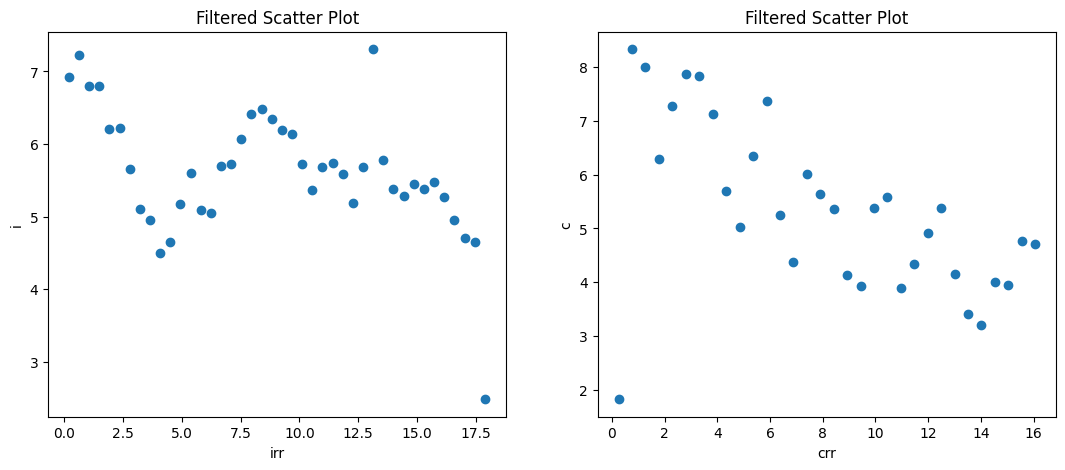

In [162]:
data = df.sample(n=1)

a = data['trkdedx'].values.to_numpy()
b = data['trkrr'].values.to_numpy()

i = np.array(a[0][0][0]) # event, track, plane
irr = np.array(b[0][0][0])
c = np.array(a[0][0][1])
crr = np.array(b[0][0][1])

i = i[i != -99999.0]
irr = irr[irr != -99999.0]

c = c[c != -99999.0]
crr = crr[crr != -99999.0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.scatter(irr, i)
ax1.set_xlabel("irr")
ax1.set_ylabel("i")
ax1.set_title("Filtered Scatter Plot")

ax2.scatter(crr, c)
ax2.set_xlabel("crr")
ax2.set_ylabel("c")
ax2.set_title("Filtered Scatter Plot")

plt.show()

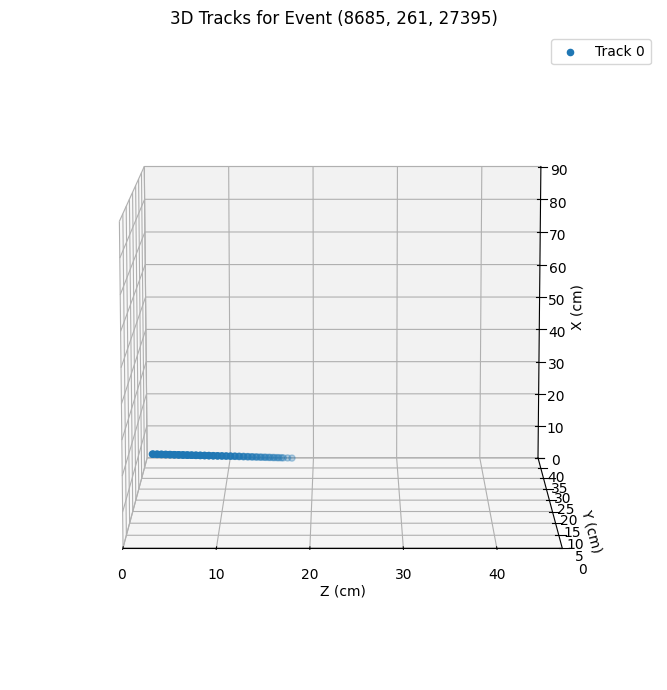

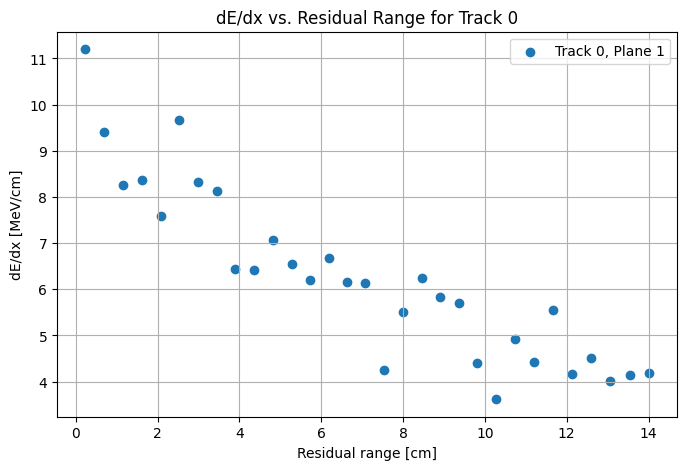

In [163]:
row = df.sample(n=1)

run = int(row['run'].iloc[0])
subrun = int(row['subrun'].iloc[0])
event = int(row['event'].iloc[0])

hit_x = ak.to_numpy(row['hit_x'])
hit_y = ak.to_numpy(row['hit_y'])
hit_z = ak.to_numpy(row['hit_z'])
hit_trkid = ak.to_numpy(row['hit_trkid'])

unique_track_ids = np.unique(hit_trkid)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for track_id in unique_track_ids:
    if track_id < 0:
        continue
    mask = hit_trkid == track_id
    x = hit_x[mask]
    y = hit_y[mask]
    z = hit_z[mask]
    ax.scatter(z, y, x, label=f"Track {track_id}")

ax.set_xlabel("Z (cm)")
ax.set_ylabel("Y (cm)")
ax.set_zlabel("X (cm)")
ax.set_title(f"3D Tracks for Event {run, subrun, event}")
ax.view_init(elev=10, azim=-90)
ax.set_xlim3d(0, 47); ax.set_ylim3d(0, 40); ax.set_zlim3d(0, 90)
ax.legend()
plt.tight_layout()
plt.show()

# dE/dx vs residual range for the first track in plane 1
trkdedx = ak.to_numpy(row['trkdedx'])
trkrr = ak.to_numpy(row['trkrr'])
trk_idx = 0
plane = 1

dEdx = np.array(trkdedx[0][trk_idx][plane])
rr   = np.array(trkrr[0][trk_idx][plane])

mask = (dEdx != -99999) & (rr != -99999)
dEdx_clean = dEdx[mask]
rr_clean = rr[mask]

plt.figure(figsize=(8,5))
plt.scatter(rr_clean, dEdx_clean, marker='o', linestyle='-', label=f'Track {trk_idx}, Plane {plane}')
plt.xlabel("Residual range [cm]")
plt.ylabel("dE/dx [MeV/cm]")
plt.title(f"dE/dx vs. Residual Range for Track {trk_idx}")
plt.legend()
plt.grid(True)
plt.show()

In [156]:
df = df.sample(n=500).reset_index(drop=True)

In [183]:
dedx = []
rr = []
for i in range(len(df)):
    d = ak.to_numpy(df['trkdedx'][i][0][0])
    r = ak.to_numpy(df['trkrr'][i][0][0])
    mask = (d != -99999) & (r != -99999)
    d = d[mask]
    r = r[mask]
    dedx.extend(d)
    rr.extend(r)

In [184]:
dedx = np.array(dedx)
rr = np.array(rr)

In [185]:
indices = np.where(dedx > 70)[0]

dedx = np.delete(dedx, indices)
rr = np.delete(rr, indices)

In [186]:
len(rr), len(dedx)

(469379, 469379)

807

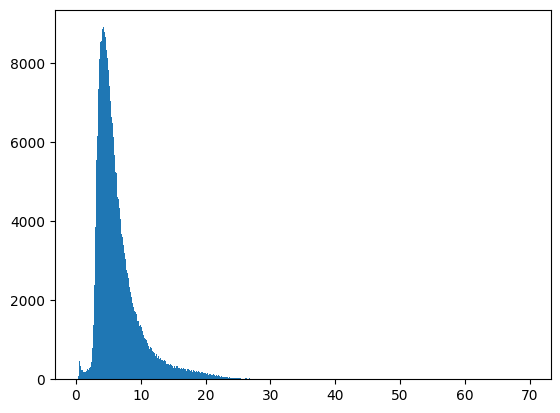

In [187]:
a = plt.hist(dedx, bins='auto')
len(a[0])

168

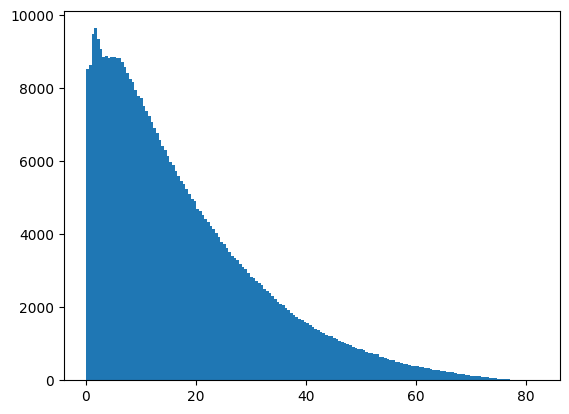

In [188]:
b = plt.hist(rr, bins='auto')
len(b[0])
# plt.xlim(-5, 100)

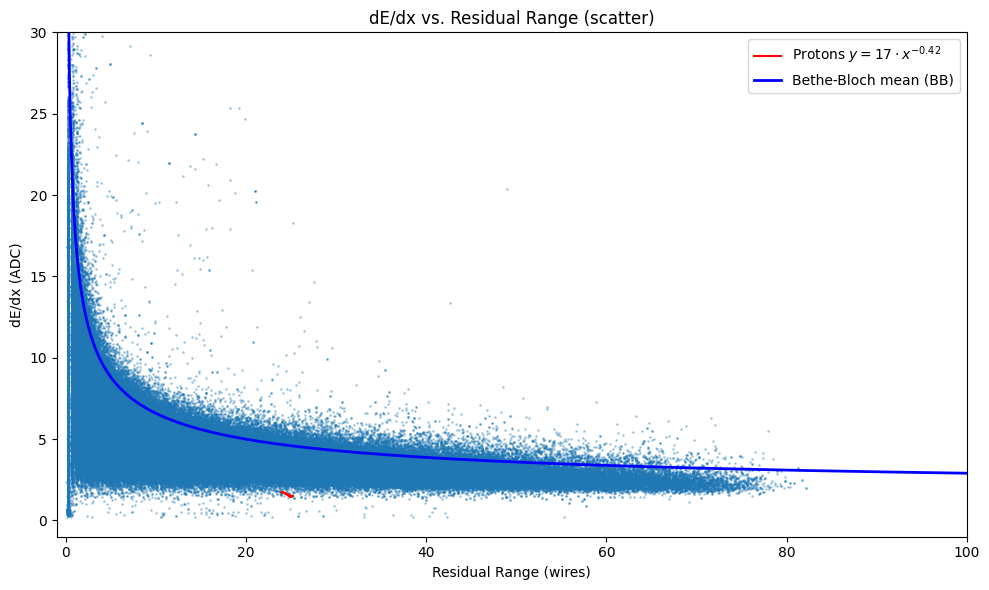

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(rr, dedx, s=1, alpha=0.3, marker='o')
plt.plot(x, y, label=r"Protons $y = 17 \cdot x^{-0.42}$", color='r')

plt.xlabel('Residual Range (wires)')
plt.ylabel('dE/dx (ADC)')
plt.ylim(-1, 30)
plt.xlim(-1, 100)
plt.title('dE/dx vs. Residual Range (scatter)')
plt.legend()
plt.tight_layout()
plt.show()

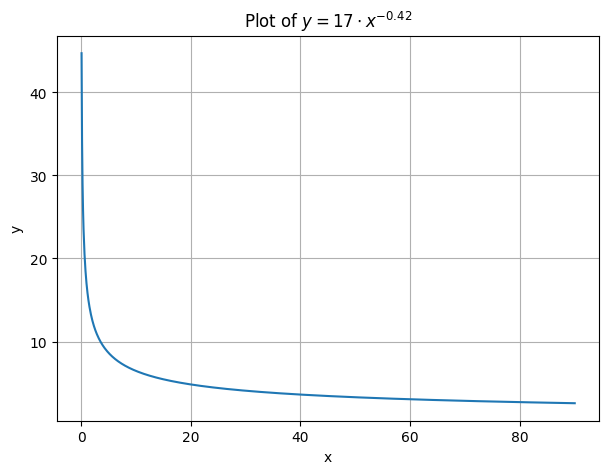

In [143]:
A = 17
b = -0.42

x = np.linspace(0.1, 90, 1000)  # Avoid x=0 for negative exponent
y = A * x**b

plt.figure(figsize=(7,5))
plt.plot(x, y, label=r"$y = 17 \cdot x^{-0.42}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of $y = 17 \cdot x^{-0.42}$")
plt.grid(True)